In [3]:
import numpy as np
import os
from scipy import sparse as sp
import matplotlib.pyplot as plt

name = "multi_thread-4"

p = os.path.abspath(f"../doctors/{name}/")

core = 0
w_in = np.load(os.path.join(p, f"w_in_{core}.npy"))
w = sp.load_npz(os.path.join(p, f"w_{core}.npz")).toarray()
w_out = np.load(os.path.join(p, f"w_out_{core}.npy"))
neurons = np.load(os.path.join(p, f"neurons_{core}.npy")).T

print("W_in", "max", "mean", "sd")
print(np.max(np.abs(w_in)), np.mean(w_in), np.std(w_in))

print("W", "max", "mean", "sd")
print(np.max(np.abs(w)), np.mean(w), np.std(w))

print("W_out", "max", "mean", "sd")
print(np.max(np.abs(w_out)), np.mean(w_out), np.std(w_out))

print("W spectral radius")
print(np.max(np.abs(np.linalg.eigvals(w))))

W_in max mean sd
0.3654377535381898 0.0005904820541855336 0.08938802379170939
W max mean sd
0.1462281239081698 2.800450822829509e-05 0.032663726159312415
W_out max mean sd
0.4290303603666459 0.00047331924215188084 0.07325420168928917
W spectral radius
0.9499999999999972


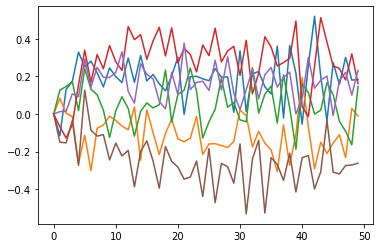

In [4]:
n = np.arange(neurons.shape[1])

indicies = n < 50

plt.plot(n[indicies], neurons[0][indicies])
plt.plot(n[indicies], neurons[1][indicies])
plt.plot(n[indicies], neurons[2][indicies])
plt.plot(n[indicies], neurons[3][indicies])
plt.plot(n[indicies], neurons[4][indicies])
plt.plot(n[indicies], neurons[5][indicies])


NRMSE: 0.9190080409378101


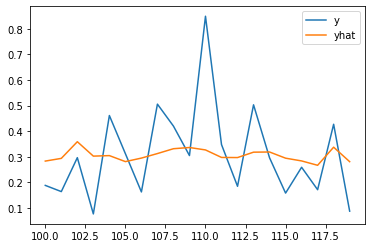

In [5]:
ys = np.load("../trash/ys.npy")
yhats = np.load("../trash/yhats.npy")

delta = np.mean((yhats - ys) * (yhats - ys), axis=0)
variances = np.var(ys, axis=0)
NMSE = delta / variances
NRMSE = np.sqrt(NMSE)
NRMSE = np.mean(NRMSE)

print(f"NRMSE: {NRMSE}")

y = ys.T
yhat = yhats.T
n = np.arange(ys.shape[0])

window = 20
begin = 100
indicies = (n >= begin) & (n < (begin + window))

plt.plot(n[indicies], y[0][indicies], label="y")
plt.plot(n[indicies], yhat[0][indicies], label="yhat")
plt.legend()

In [ ]:
import json

name = "hyper_optimization-9"

with open("../doctors/{name}/results.json", "r") as f:
    ranked = json.load(f)


In [3]:



def set_item(run, name, item):

    if isinstance(item, list):
        run[name] = np.random.choice(item)
    elif isinstance(item, dict):

        run[name] = {}
        for k, v in item.items():
            run[name][k] = np.random.choice(v)
    else:
        raise TypeError(f"Incorrect value type got: {type(item)}, expected: list or dict")

def generate_run(grid):
    
    run = {}

    for name, value in grid.items():
        
        args = name.split(":")

        if len(args) > 1:
            continue
        
        set_item(run, name, value)

    for name, value in grid.items():
        
        args = name.split(":")

        if len(args) == 1:
            continue

        name = args[2]
        condition = args[1].split("=")
        variable = condition[0]
        desired = condition[1]
        
        if run[variable] != desired:
            continue

        set_item(run, name, value)

    return run

    
def generate_runs(n):
    import json

    with open("../grid.json", "r") as f:
        grid = json.load(f)
    
    runs = []
    

    while len(runs) < n:
        run = generate_run(grid)
        
        if run in runs:
            continue
        
        runs.append(run)
    
    return runs
        

In [10]:
def update_params(run, pars):
    
    for key, value in run.items():
        
        if key not in pars:
            raise ValueError(f"Run contains key {key} which is not a valid parameter")    

        if isinstance(value, dict):
            update_params(value, pars[key])
            continue
        
        pars[key] = value

pars = {
    "a": 1,
    "b": 10,
    "c": {
        "kek": 1,
        "lol": 2
    }
}

run = {
    "a": 2,
    "c": {
        "kek": 10
    }
}

update_params(run, pars)

[2, 10, {'kek': 10, 'lol': 2}]